# What was the impact of the Medicaid expansion on the uninsured rate?

1. **As of today, which states have implemented the Medicaid expansion under the Affordable Care Act, and which have not? To answer, produce a table of state implementation dates for the Medicaid expansion, and include in your table states that have not implemented at this point. Produce your own table (don’t just copy paste from elsewhere), and cite whatever sources you used to produce this table.**

In [35]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_implementation = pd.read_csv('expansion_dates.csv')
df_implementation

,State,Expansion Date
0,ALABAMA,not implemented
1,ALASKA,9/1/2015
2,ARIZONA,1/1/2014
3,ARKANSAS,1/1/2014
4,CALIFORNIA,"Early expansion: 11/1/2010, 1/1/2014*"
5,COLORADO,1/1/2014
6,CONNECTICUT,"Early expansion: 4/1/2010, 1/1/2014*"
7,DELAWARE,1/1/2014
8,DISTRICT OF COLUMBIA,1/1/2014
9,FLORIDA,not implemented


***Sources:***

https://www.kff.org/health-reform/state-indicator/state-activity-around-expanding-medicaid-under-the-affordable-care-act/

https://www.kff.org/health-reform/issue-brief/states-getting-a-jump-start-on-health/

http://www.shadac.org/news/medicaid-“early-opt-in”-states

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4769999/

*expansion_dates.csv* is a file I constructed by hand from the above sources.

Note: An asterisk * denotes a state that expanded Medicaid early, from 2010-2013, under provisions of the Affordable Care Act. Details on early expansion states can be found in 2nd-4th links below. Placing a precise date on the expansion for these early states is difficult because in many cases they phased in different provisions at different times or in only some parts of each state. In the main KFF table of expansion dates, these early states are listed as 1/1/14 for clarity, as this is the date when all provisions of the expansion were fully in place for these early states. 

2. **We are interested in better understanding the evolution of the state-level uninsured rate over time in states that expanded Medicaid versus states that did not. Navigate to
https://www.census.gov/data/tables/time-series/demo/health-insurance/historical-series/hic.html.**

    **What table will be best to use to study this question? Download it.**


We want HIC-4, Health Insurance Coverage Status and Type of Coverage by State--All Persons: 2008 to 2017 (hic04_acs.xls). This is based on the ACS, which the Census indicates is better for "single-year estimates of health insurance at the state level." We want the "All Persons" table because we are interested in the total uninsured rate. 

Below, I have read in using pd.read_excel, and set parameters to read it in as a relatively easy-to-use dataframe.

You could have transformed your excel sheet to a useful dataframe in any number of ways, including (though this isn't ideal) pre-processing before importing into Pandas. The way I imported and transformed below is only one of many options.

In [2]:
df_insurance = pd.read_excel('hic04_acs.xls', index_col=[0,1], header=4, skipfooter=4)
df_insurance

Estimate Margin of Error  Percent  \
UNITED STATES Total                320775              15    100.0   
              Any coverage         292756             184     91.3   
              Uninsured             28019             188      8.7   
              Private              216952             419     67.6   
              ..Employer-based     176319             358     55.0   
              ..Direct-purchase     43406             189     13.5   
              ..TRICARE              8640              79      2.7   
              Public               113720             218     35.5   
              ..Medicaid            66131             236     20.6   
              ..Medicare            55473              60     17.3   
              ..VA Care              7290              53      2.3   
ALABAMA       Total                  4794               2    100.0   
              Any coverage           4345              16     90.6   
              Uninsured               449              16      9.4   
              Private                3205              27     66.9   
              ..Employer-based       2552              28     53.2   
              ..Direct-purchase       671              16     14.0   
              ..TRICARE               215              10      4.5   
              Public                 1812              21     37.8   
              ..Medicaid              983              20     20.5   
              ..Medicare              972               8     20.3   
              ..VA Care               142               6      3.0   
ALASKA        Total                   716               2    100.0   
              Any coverage            618               6     86.3   
              Uninsured                98               6     13.7   
              Private                 453               9     63.2   
              ..Employer-based        368              10     51.4   
              ..Direct-purchase        55               5      7.6   
              ..TRICARE                70               6      9.8   
              Public                  248               8     34.7   
...                                   ...             ...      ...   
WEST VIRGINIA Private                1108              16     62.0   
              ..Employer-based        937              16     52.4   
              ..Direct-purchase       185               7     10.4   
              ..TRICARE                37               4      2.1   
              Public                  852              14     47.6   
              ..Medicaid              498              14     27.9   
              ..Medicare              411               5     23.0   
              ..VA Care                60               4      3.3   
WISCONSIN     Total                  5724               1    100.0   
              Any coverage           5415              11     94.6   
              Uninsured               309              11      5.4   
              Private                4306              23     75.2   
              ..Employer-based       3569              25     62.4   
              ..Direct-purchase       833              15     14.5   
              ..TRICARE                81               5      1.4   
              Public                 1873              21     32.7   
              ..Medicaid              978              21     17.1   
              ..Medicare             1038               7     18.1   
              ..VA Care               136               5      2.4   
WYOMING       Total                   569               1    100.0   
              Any coverage            499               7     87.7   
              Uninsured                70               7     12.3   
              Private                 412               9     72.5   
              ..Employer-based        325               9     57.2   
              ..Direct-purchase        89               5     15.6   
              ..TRICARE                20  

Although all you need to do at this point is download and display this table, you can see that you are missing some important column header information - the year, which was contained in an earlier row. 

I'll go ahead and fix this.

First, note it is easy to rename columns in a pandas dataframe. Below I create an example dataframe and show how easy it is to rename the columns using a list.

In [3]:
# Fake example dataframe
df_example = pd.DataFrame({'colA': ['a', 'b'], 'colB': ['c', 'd']})
df_example

,colA,colB
0,a,c
1,b,d


In [4]:
# Column names are stored in a list as a property of the data frame:
df_example.columns

Index(['colA', 'colB'], dtype='object')

In [5]:
# You can simply overwrite df.columns with a desired new list of column names: 
df_example.columns = ['My New Column Name A', 'My New Column Name B']
df_example

,My New Column Name A,My New Column Name B
0,a,c
1,b,d


Returning to my actual data, I'll print out the excel sheet unmodified, to inspect it: 

In [6]:
pd.read_excel('hic04_acs.xls').head()

,"Table with row headers in columns A and B, column headers in rows 4 and 5.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,Table HIC-4_ACS. Health Insurance Coverage Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: Numbers in thousands. Civilian noninstit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nation/State,Coverage,2017,NaN,NaN,NaN,2016,NaN,NaN,NaN,...,NaN,NaN,2009,NaN,NaN,NaN,2008,NaN,NaN,NaN
3,NaN,NaN,Estimate,Margin of Error,Percent,Margin of Error,Estimate,Margin of Error,Percent,Margin of Error,...,Percent,Margin of Error,Estimate,Margin of Error,Percent,Margin of Error,Estimate,Margin of Error,Percent,Margin of Error
4,UNITED STATES,Total,320775,15,100,Z,318176,15,100,Z,...,100,Z,301472,23,100,Z,298571,20,100,Z


Looks like I have four columns for each year, starting from 2017 and working back to 2008.  I'll print my column names to see what I have and what's missing:

In [7]:
# What are my column names?
df_insurance.columns

Index(['Estimate', 'Margin of Error', 'Percent', 'Margin of Error.1',
       'Estimate.1', 'Margin of Error.2', 'Percent.1', 'Margin of Error.3',
       'Estimate.2', 'Margin of Error.4', 'Percent.2', 'Margin of Error.5',
       'Estimate.3', 'Margin of Error.6', 'Percent.3', 'Margin of Error.7',
       'Estimate.4', 'Margin of Error.8', 'Percent.4', 'Margin of Error.9',
       'Estimate.5', 'Margin of Error.10', 'Percent.5', 'Margin of Error.11',
       'Estimate.6', 'Margin of Error.12', 'Percent.6', 'Margin of Error.13',
       'Estimate.7', 'Margin of Error.14', 'Percent.7', 'Margin of Error.15',
       'Estimate.8', 'Margin of Error.16', 'Percent.8', 'Margin of Error.17',
       'Estimate.9', 'Margin of Error.18', 'Percent.9', 'Margin of Error.19'],
      dtype='object')

The easiest - though definitely not the most elegant - way to modify these column names to include the date is just making a new column name list by hand:

In [8]:
new_column_names = ['2017-Estimate',
 '2017-Margin of Error',
 '2017-Percent',
 '2017-Margin of Error.1',
 '2016-Estimate.1',
 '2016-Margin of Error.2',
 '2016-Percent.1',
 '2016-Margin of Error.3',
 '2015-Estimate.2',
 '2015-Margin of Error.4',
 '2015-Percent.2',
 '2015-Margin of Error.5',
 '2014-Estimate.3',
 '2014-Margin of Error.6',
 '2014-Percent.3',
 '2014-Margin of Error.7',
 '2013-Estimate.4',
 '2013-Margin of Error.8',
 '2013-Percent.4',
 '2013-Margin of Error.9',
 '2012-Estimate.5',
 '2012-Margin of Error.10',
 '2012-Percent.5',
 '2012-Margin of Error.11',
 '2011-Estimate.6',
 '2011-Margin of Error.12',
 '2011-Percent.6',
 '2011-Margin of Error.13',
 '2010-Estimate.7',
 '2010-Margin of Error.14',
 '2010-Percent.7',
 '2010-Margin of Error.15',
 '2009-Estimate.8',
 '2009-Margin of Error.16',
 '2009-Percent.8',
 '2009-Margin of Error.17',
 '2008-Estimate.9',
 '2008-Margin of Error.18',
 '2008-Percent.9',
 '2008-Margin of Error.19']

And then assign that column list to the data frame

In [9]:
df_insurance.columns = new_column_names
df_insurance

2017-Estimate 2017-Margin of Error  \
UNITED STATES Total                     320775                   15   
              Any coverage              292756                  184   
              Uninsured                  28019                  188   
              Private                   216952                  419   
              ..Employer-based          176319                  358   
              ..Direct-purchase          43406                  189   
              ..TRICARE                   8640                   79   
              Public                    113720                  218   
              ..Medicaid                 66131                  236   
              ..Medicare                 55473                   60   
              ..VA Care                   7290                   53   
ALABAMA       Total                       4794                    2   
              Any coverage                4345                   16   
              Uninsured                    449                   16   
              Private                     3205                   27   
              ..Employer-based            2552                   28   
              ..Direct-purchase            671                   16   
              ..TRICARE                    215                   10   
              Public                      1812                   21   
              ..Medicaid                   983                   20   
              ..Medicare                   972                    8   
              ..VA Care                    142                    6   
ALASKA        Total                        716                    2   
              Any coverage                 618                    6   
              Uninsured                     98                    6   
              Private                      453                    9   
              ..Employer-based             368                   10   
              ..Direct-purchase             55                    5   
              ..TRICARE                     70                    6   
              Public                       248                    8   
...                                        ...                  ...   
WEST VIRGINIA Private                     1108                   16   
              ..Employer-based             937                   16   
              ..Direct-purchase            185                    7   
              ..TRICARE                     37                    4   
              Public                       852                   14   
              ..Medicaid                   498                   14   
              ..Medicare                   411                    5   
              ..VA Care                     60                    4   
WISCONSIN     Total                       5724                    1   
              Any coverage                5415                   11   
              Uninsured                    309                   11   
              Private                     4306                   23   
              ..Employer-based            3569                   25   
              ..Direct-purchase            833                   15   
              ..TRICARE                     81                    5   
              Public                      1873                   21   
              ..Medicaid                   978                   21   
              ..Medicare                  1038                    7   
              ..VA Care                    136                    5   
WYOMING       Total                        569                    1   
              Any coverage                 499                    7   
              Uninsured                     70                    7   
              Private                      412                    9   
              ..Employer-based             325                    9   
              ..Direct-purchase             89           

3. **Think about some hypotheses for what might happen to overall state-level rates of uninsurance when a state expands the Medicaid program. What would have to be true for the uninsured rate to decrease after a state expands Medicaid? Increase? Have no impact?**

The most obvious hypothesis is that expanding Medicaid will reduce a state's overall uninsured rate. The expansion provides low-income individuals who were not previously eligible for Medicaid access to free health insurance. All other things equal, we expect this would reduce uninsurance rates.

For it to be true that the Medicaid expansion had no impact on the uninsurance rate, it could be the case that people did not take-up the program despite it being newly available to them. For example, in the Oregon Medicaid expansion that we discussed in class (which predated the ACA Medicaid expansion) 2/3 of people who won the lottery did not take up Medicaid. If these effects were even more extreme in other states, and most newly-eligible people do not actually enroll in Medicaid, we might not detect any impact on the overall uninsured rate.

It could also be the case that the Medicaid expansion has no effect on the total uninsured rate because of *crowd-out.* Suppose that newly-eligible low income individuals typically are offered insurance by their employer, but after the Medicaid expansion, those employers dropped their insurance offerings. The net effect on the total uninsured rate would be zero. There could also in theory be crowd-out of insurance purchased directly by these low-income individuals. 

For it to be true that the Medicaid expansion actually *increased* the total uninsured rate, there would have to be complicated and large-magnitude crowd-out dynamics. Suppose that the existence of the Medicaid expansion induced employers of low-income individuals to drop health insurance, but then those individuals did not actually sign up for Medicaid. The expansion could in theory thus result in a net increase in the uninsurance rate.

There is a brief discussion of the literature on crowd-out here, with accompanying links:

https://www.kff.org/medicaid/issue-brief/the-effects-of-medicaid-expansion-under-the-aca-updated-findings-from-a-literature-review-march-2018/

4. **Produce an informative graph of the uninsured rate over time that helps us understand better the relationship between the expansion of Medicaid and state-level uninsurance rates. In order to create a compelling graph, you will need to think about grouping states into a few natural and useful categories. A graph with 50 lines, one for each state, is not easy to read or understand!**

First, we might want to select the relevant rows and columns that represent percent uninsured at the state level. We'll start with a column slice to grab only the 'Percent' columns:

In [10]:
# Note what this first line does - it's called a list comprehension, and 
# it quickly made a list only of the 'Percent' columns. You could have also made
# a list by hand yourself

column_list = [x for x in df_insurance.columns if 'Percent' in x] 
column_list

['2017-Percent',
 '2016-Percent.1',
 '2015-Percent.2',
 '2014-Percent.3',
 '2013-Percent.4',
 '2012-Percent.5',
 '2011-Percent.6',
 '2010-Percent.7',
 '2009-Percent.8',
 '2008-Percent.9']

In [11]:
df_use = df_insurance[column_list]
df_use

2017-Percent  2016-Percent.1  2015-Percent.2  \
UNITED STATES Total                     100.0           100.0           100.0   
              Any coverage               91.3            91.4            90.6   
              Uninsured                   8.7             8.6             9.4   
              Private                    67.6            67.8            67.5   
              ..Employer-based           55.0            54.7            54.4   
              ..Direct-purchase          13.5            14.1            13.8   
              ..TRICARE                   2.7             2.7             2.7   
              Public                     35.5            35.4            34.7   
              ..Medicaid                 20.6            20.9            20.5   
              ..Medicare                 17.3            17.0            16.7   
              ..VA Care                   2.3             2.3             2.2   
ALABAMA       Total                     100.0           100.0           100.0   
              Any coverage               90.6            90.9            89.9   
              Uninsured                   9.4             9.1            10.1   
              Private                    66.9            67.9            66.9   
              ..Employer-based           53.2            53.5            53.2   
              ..Direct-purchase          14.0            14.9            14.2   
              ..TRICARE                   4.5             4.5             4.3   
              Public                     37.8            36.9            36.6   
              ..Medicaid                 20.5            20.1            20.1   
              ..Medicare                 20.3            19.8            19.4   
              ..VA Care                   3.0             2.9             2.9   
ALASKA        Total                     100.0           100.0           100.0   
              Any coverage               86.3            86.0            85.1   
              Uninsured                  13.7            14.0            14.9   
              Private                    63.2            67.3            67.0   
              ..Employer-based           51.4            55.0            54.6   
              ..Direct-purchase           7.6             7.8             9.0   
              ..TRICARE                   9.8             9.8            10.1   
              Public                     34.7            29.4            28.7   
...                                       ...             ...             ...   
WEST VIRGINIA Private                    62.0            62.3            63.4   
              ..Employer-based           52.4            52.7            53.8   
              ..Direct-purchase          10.4            10.9            10.6   
              ..TRICARE                   2.1             2.3             2.2   
              Public                     47.6            48.4            46.2   
              ..Medicaid                 27.9            28.8            26.8   
              ..Medicare                 23.0            22.9            22.2   
              ..VA Care                   3.3             3.6             3.6   
WISCONSIN     Total                     100.0           100.0           100.0   
              Any coverage               94.6            94.7            94.3   
              Uninsured                   5.4             5.3             5.7   
              Private                    75.2            75.2            75.0   
              ..Employer-based           62.4            61.7            61.8   
              ..Direct-purchase          14.5            15.2            14.9   
              ..TRICARE                   1.4             1.5             1.4   
              Public                     32.7            33.0            32.5   
              ..Medicaid                 17.1            17.8            17.4   
              ..Medicare                 18.1            17.8   

Next we want to choose only the rows that have the Uninsured rate. Because this data was read in with a row index containing the Uninsured variable, the syntax is a little complicated. I am actually going to get rid of the index using reset_index() instead. You may not have read in the data with a row index, so you may not want to do this. You can also preserve the row index if you prefer.

In [12]:
df_use = df_use.reset_index()
df_use

,level_0,level_1,2017-Percent,2016-Percent.1,2015-Percent.2,2014-Percent.3,2013-Percent.4,2012-Percent.5,2011-Percent.6,2010-Percent.7,2009-Percent.8,2008-Percent.9
0,UNITED STATES,Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,UNITED STATES,Any coverage,91.3,91.4,90.6,88.3,85.5,85.2,84.9,84.5,84.9,85.4
2,UNITED STATES,Uninsured,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
3,UNITED STATES,Private,67.6,67.8,67.5,66.4,65.0,65.1,65.2,65.8,67.4,69.6
4,UNITED STATES,..Employer-based,55.0,54.7,54.4,54.2,54.0,54.6,54.7,54.9,56.6,58.7
5,UNITED STATES,..Direct-purchase,13.5,14.1,13.8,12.8,11.9,12.2,12.2,12.7,13.1,14.2
6,UNITED STATES,..TRICARE,2.7,2.7,2.7,2.6,2.6,2.7,2.6,2.6,2.5,2.6
7,UNITED STATES,Public,35.5,35.4,34.7,33.2,31.6,31.1,30.5,29.7,28.5,27.3
8,UNITED STATES,..Medicaid,20.6,20.9,20.5,19.2,17.9,17.9,17.6,17.0,16.2,15.1
9,UNITED STATES,..Medicare,17.3,17.0,16.7,16.3,15.9,15.5,15.0,14.7,14.4,14.3


In [13]:
df_uninsured = df_use[df_use['level_1']=='Uninsured']
df_uninsured

,level_0,level_1,2017-Percent,2016-Percent.1,2015-Percent.2,2014-Percent.3,2013-Percent.4,2012-Percent.5,2011-Percent.6,2010-Percent.7,2009-Percent.8,2008-Percent.9
2,UNITED STATES,Uninsured,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
13,ALABAMA,Uninsured,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3
24,ALASKA,Uninsured,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1
35,ARIZONA,Uninsured,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0
46,ARKANSAS,Uninsured,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1
57,CALIFORNIA,Uninsured,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3
68,COLORADO,Uninsured,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7
79,CONNECTICUT,Uninsured,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8
90,DELAWARE,Uninsured,5.4,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0
101,DISTRICT OF COLUMBIA,Uninsured,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6


Finally, I'll merge in implementation dates:

In [14]:
df_analysis_uninsured = pd.merge(df_uninsured, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis_uninsured

,level_0,level_1,2017-Percent,2016-Percent.1,2015-Percent.2,2014-Percent.3,2013-Percent.4,2012-Percent.5,2011-Percent.6,2010-Percent.7,2009-Percent.8,2008-Percent.9,State,Expansion Date
0,ALABAMA,Uninsured,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3,ALABAMA,not implemented
1,ALASKA,Uninsured,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1,ALASKA,9/1/2015
2,ARIZONA,Uninsured,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0,ARIZONA,1/1/2014
3,ARKANSAS,Uninsured,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1,ARKANSAS,1/1/2014
4,CALIFORNIA,Uninsured,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3,CALIFORNIA,"Early expansion: 11/1/2010, 1/1/2014*"
5,COLORADO,Uninsured,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7,COLORADO,1/1/2014
6,CONNECTICUT,Uninsured,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8,CONNECTICUT,"Early expansion: 4/1/2010, 1/1/2014*"
7,DELAWARE,Uninsured,5.4,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0,DELAWARE,1/1/2014
8,DISTRICT OF COLUMBIA,Uninsured,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6,DISTRICT OF COLUMBIA,1/1/2014
9,FLORIDA,Uninsured,12.9,12.5,13.3,16.6,20.0,20.1,20.9,21.3,20.9,20.2,FLORIDA,not implemented


Now, in preparation to make a graph, we need to do some thought. How should we group states? Because we are interested in the impact of the Medicaid expansion on the uninsured rate over time, it's natural to want to group states by their expansion date. 

I'll first explore frequencies according to implementation date:

In [15]:
# The following command tabulates our data, showing the number of observations with each implementation date
df_analysis_uninsured.groupby('Expansion Date').size()

Expansion Date
1/1/2014                                  20
1/1/2015                                   1
1/1/2016                                   1
1/1/2019                                   1
1/10/2019                                  1
2/1/2015                                   1
4/1/2014                                   1
7/1/2016                                   1
8/15/2014                                  1
9/1/2015                                   1
Early expansion: 03/1/2010, 1/1/2014*      1
Early expansion: 04/14/2011, 1/1/2014*     1
Early expansion: 1/3/2011, 1/1/2014*       1
Early expansion: 11/1/2010,  1/1/2014*     1
Early expansion: 4/1/2010, 1/1/2014*       1
approved; TBD                              3
not implemented                           14
dtype: int64

I am going to start by grouping roughly by year of implementation. I'll make a category for early implementers, group late-implementers from 2015-2017 together (because these states all implemented in the period for which we have uninsured rate data), and include 2019 and TBD implementers with the non-implementers.

You might have made different choices, but you should have come up with no more than 3-5 logical state groups.

A straightforward way to do this would be to simply make another column in your original Expansion Date table, containing your category groupings.

To be a bit cleaner, I will actually make another dataframe containing groupings, and merge them together.

In [16]:
categories = pd.read_csv('categories.csv', header=None, names=['Expansion Date', 'category'])
categories

,Expansion Date,category
0,1/1/2014,2014
1,1/1/2015,late
2,1/1/2016,late
3,1/1/2019,never
4,1/10/2019,never
5,2/1/2015,late
6,4/1/2014,2014
7,7/1/2016,late
8,8/15/2014,2014
9,9/1/2015,late


In [17]:
df_analysis_uninsured = pd.merge(df_analysis_uninsured, categories, on = 'Expansion Date')
df_analysis_uninsured

,level_0,level_1,2017-Percent,2016-Percent.1,2015-Percent.2,2014-Percent.3,2013-Percent.4,2012-Percent.5,2011-Percent.6,2010-Percent.7,2009-Percent.8,2008-Percent.9,State,Expansion Date,category
0,ALABAMA,Uninsured,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3,ALABAMA,not implemented,never
1,FLORIDA,Uninsured,12.9,12.5,13.3,16.6,20.0,20.1,20.9,21.3,20.9,20.2,FLORIDA,not implemented,never
2,GEORGIA,Uninsured,13.4,12.9,13.9,15.8,18.8,18.4,19.6,19.7,19.1,18.2,GEORGIA,not implemented,never
3,KANSAS,Uninsured,8.7,8.7,9.1,10.2,12.3,12.6,12.6,13.9,13.2,11.4,KANSAS,not implemented,never
4,MISSISSIPPI,Uninsured,12.0,11.8,12.7,14.5,17.1,17.0,17.7,18.2,17.9,17.0,MISSISSIPPI,not implemented,never
5,MISSOURI,Uninsured,9.1,8.9,9.8,11.7,13.0,13.6,13.7,13.2,13.2,12.4,MISSOURI,not implemented,never
6,NORTH CAROLINA,Uninsured,10.7,10.4,11.2,13.1,15.6,16.6,16.3,16.8,16.1,15.5,NORTH CAROLINA,not implemented,never
7,OKLAHOMA,Uninsured,14.2,13.8,13.9,15.4,17.7,18.4,18.7,18.9,18.7,18.7,OKLAHOMA,not implemented,never
8,SOUTH CAROLINA,Uninsured,11.0,10.0,10.9,13.6,15.8,16.8,16.7,17.5,16.8,16.7,SOUTH CAROLINA,not implemented,never
9,SOUTH DAKOTA,Uninsured,9.1,8.7,10.2,9.8,11.3,11.5,11.9,12.4,13.1,11.1,SOUTH DAKOTA,not implemented,never


Now, I want to get the simple mean of each category in each year:

In [18]:
grouped = df_analysis_uninsured.groupby('category').mean()
grouped

,2017-Percent,2016-Percent.1,2015-Percent.2,2014-Percent.3,2013-Percent.4,2012-Percent.5,2011-Percent.6,2010-Percent.7,2009-Percent.8,2008-Percent.9
category,,,,,,,,,,
2014,6.222727,6.050000,6.777273,8.763636,11.786364,11.886364,12.227273,12.781818,12.472727,12.277273
early,6.180000,6.060000,6.880000,9.060000,12.400000,12.320000,12.600000,12.820000,12.380000,11.800000
late,8.860000,9.220000,10.880000,13.320000,15.060000,15.900000,16.100000,16.000000,16.180000,15.200000
never,10.500000,10.178947,10.889474,12.631579,14.668421,14.936842,15.305263,15.610526,15.357895,14.647368


In [19]:
grouped.columns = [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
grouped

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
category,,,,,,,,,,
2014,6.222727,6.050000,6.777273,8.763636,11.786364,11.886364,12.227273,12.781818,12.472727,12.277273
early,6.180000,6.060000,6.880000,9.060000,12.400000,12.320000,12.600000,12.820000,12.380000,11.800000
late,8.860000,9.220000,10.880000,13.320000,15.060000,15.900000,16.100000,16.000000,16.180000,15.200000
never,10.500000,10.178947,10.889474,12.631579,14.668421,14.936842,15.305263,15.610526,15.357895,14.647368


In [20]:
import matplotlib.pyplot as plt

The above table, *grouped*, will be easier to work with using matplotlib if we have year as a row (and not as column headers as above). There are many ways to do this, but stacking and unstacking is extremely handy for you to know about:

In [21]:
grouped = grouped.stack()
grouped

category      
2014      2017     6.222727
          2016     6.050000
          2015     6.777273
          2014     8.763636
          2013    11.786364
          2012    11.886364
          2011    12.227273
          2010    12.781818
          2009    12.472727
          2008    12.277273
early     2017     6.180000
          2016     6.060000
          2015     6.880000
          2014     9.060000
          2013    12.400000
          2012    12.320000
          2011    12.600000
          2010    12.820000
          2009    12.380000
          2008    11.800000
late      2017     8.860000
          2016     9.220000
          2015    10.880000
          2014    13.320000
          2013    15.060000
          2012    15.900000
          2011    16.100000
          2010    16.000000
          2009    16.180000
          2008    15.200000
never     2017    10.500000
          2016    10.178947
          2015    10.889474
          2014    12.631579
          2013    14.668421
     

We could subset this into four different datasets and plot four graphs on top of each other, but an even easier way is to then unstack the data so that the categories are on top:

In [22]:
grouped = grouped.unstack(0)
grouped

category,2014,early,late,never
2017,6.222727,6.18,8.86,10.500000
2016,6.050000,6.06,9.22,10.178947
2015,6.777273,6.88,10.88,10.889474
2014,8.763636,9.06,13.32,12.631579
2013,11.786364,12.40,15.06,14.668421
2012,11.886364,12.32,15.90,14.936842
2011,12.227273,12.60,16.10,15.305263
2010,12.781818,12.82,16.00,15.610526
2009,12.472727,12.38,16.18,15.357895
2008,12.277273,11.80,15.20,14.647368


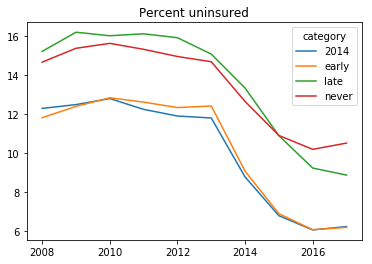

In [23]:
grouped.plot(title="Percent uninsured")

5. **Next, produce two additional graphs with a similar structure, that illustrate the effect of expanding Medicaid. The first should graph should consider the percentage of state population enrolled in Medicaid, and the second should consider the percentage of state population with private insurance.**


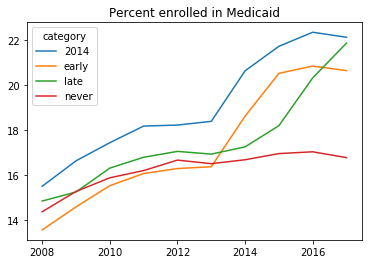

In [24]:
df_medicaid = df_use[df_use['level_1']=='..Medicaid']
df_analysis = pd.merge(df_medicaid, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis = pd.merge(df_analysis, categories, on = 'Expansion Date')
grouped = df_analysis.groupby('category').mean()
grouped.columns = [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
grouped = grouped.stack()
grouped = grouped.unstack(0)
grouped.plot(title="Percent enrolled in Medicaid")

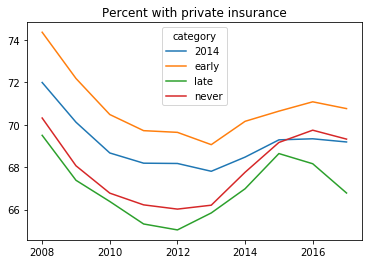

In [25]:
df_medicaid = df_use[df_use['level_1']=='Private']
df_analysis = pd.merge(df_medicaid, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis = pd.merge(df_analysis, categories, on = 'Expansion Date')
grouped = df_analysis.groupby('category').mean()
grouped.columns = [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
grouped = grouped.stack()
grouped = grouped.unstack(0)
grouped.plot(title="Percent with private insurance")

6. **Consider the graphs you made. What can you say about the causal effect of the Medicaid expansion on the uninsured rate? Be specific about how what you have found relates to this question, and be precise about what you can and cannot say with certainty.**


It seems likely there is a causal impact of the Medicaid expansion on the overall uninsured rate. The never-adopting states show a clearly different pattern than all other groups, with a less extreme declining trend in uninsured throughout the time period. The never adopting states end up in 2017 with the highest uninsured rate overall.

The "Percent Enrolled in Medicaid" graph shows us that the Medicaid expansions is in fact increasing the number of people with insurance through Medicaid. There isn't something weird going on where Medicaid expansions states are decreasing their overall number of uninsured people by other means. The increases in Medicaid coverage occur at the times we'd expect - in 2014 for states that expanded on-time, and 2015-2016 for late expanders. Never expanders don't see major increases in Medicaid coverage.

Finally, we can consider the private-insurance crowd-out concerns discussed above. Although it is hard to know the counterfactual - would private insurance have increased in the absence of the Medicaid expansion? - we can say that private insurance does not seem to decline in the 2014 and early adopting states. On the other hand, we *do* see declines in private insurance in the late adopting states, which is interesting and indicates that there are possibly some systematic differences in those late adopters.

To investigate this further, I broke private insurance into Employer-based and Direct-purchase (you didn't need to do this). We should expect direct purchase to decline in Medicaid expansion states, and that is not concerning on a policy level. But declines in employer based insurance might be a particularly problematic type of crowd-out:

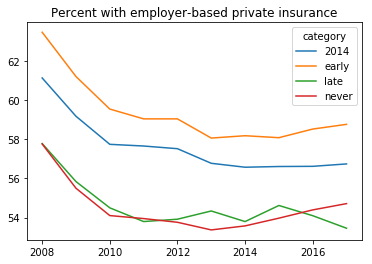

In [26]:
df_medicaid = df_use[df_use['level_1']=='..Employer-based']
df_analysis = pd.merge(df_medicaid, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis = pd.merge(df_analysis, categories, on = 'Expansion Date')
grouped = df_analysis.groupby('category').mean()
grouped.columns = [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
grouped = grouped.stack()
grouped = grouped.unstack(0)
grouped.plot(title="Percent with employer-based private insurance")

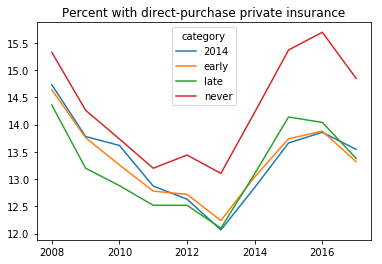

In [27]:
df_medicaid = df_use[df_use['level_1']=='..Direct-purchase']
df_analysis = pd.merge(df_medicaid, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis = pd.merge(df_analysis, categories, on = 'Expansion Date')
grouped = df_analysis.groupby('category').mean()
grouped.columns = [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
grouped = grouped.stack()
grouped = grouped.unstack(0)
grouped.plot(title="Percent with direct-purchase private insurance")

Unlike every other category, for late expanders Medicaid may have crowded out private insurance to some degree. My theory is this may have to do with a correlation between state-level poverty and the robustness of the state level level labor market in states that expanded on time or early, versus states that expanded late or never.

7. **(Extra Credit) Conduct a difference-in-differences analysis on the impact of Medicaid expansion on the uninsured rate. Explain any modeling choices you have made in order to conduct this analysis. What assumptions need to hold for you analysis to be valid? Do you believe they hold?**


A very helpful simple explainer of DD can be found __[here](https://www.mailman.columbia.edu/research/population-health-methods/difference-difference-estimation)__. A simple/canonical DD framework, is also described __[here](https://the-tarzan.com/2011/06/20/differences-in-differences-estimation-in-r-and-stata/)__.

First, I note that I will do my analysis by excluding late adopters from the analysis entirely. Looking at the above analysis, these states just look pretty different. They have a higher level of pre-ACA uninsurance rates, looking like the never-adopters before expanding. They show a delayed effect of Medicaid (which would be expected, of course, but complicates a simple analysis) and have this strange private insurance decline that is unique compared to the other state groups. 

I will further group early adopters with 2014 adopters. We know that while they adopted some elements of the expansion early, they also are counted by some sources as expanding in 2014 because all provisions finally came into force then. They also look similar to the 2014 adopters when plotted on the above graphs.

First, we will do a simple two-way comparison of adopting and non adopting states. This canonical Difference-in-Difference analysis contrasts the mean outcome (Uninsured rate) in states that adopted the policy against states that did not, assuming the states that did not adopt would have followed **parallel trends** with the the states that did, and thus can be used as controls. Under this framework, we find the policy effect by conducting a double-difference (hence the name).

In [28]:
df_analysis_uninsured.columns = ['State Name', 'Insurance Status', 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 'State', 'Expansion Date', 'category']
df_analysis = df_analysis_uninsured[df_analysis_uninsured['category'] != 'late']
df_analysis = df_analysis[['State', 'category', 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]].set_index(['State', 'category']).stack().reset_index()
df_analysis.columns = ['State', 'Category', 'Year', 'UninsuredRate']
df_analysis['AdoptedMedicaid'] = (df_analysis['Category'] != 'never') * 1

In [29]:
pre = df_analysis[df_analysis['Year']<2014].groupby('AdoptedMedicaid').mean()['UninsuredRate']
pre

AdoptedMedicaid
0    15.087719
1    12.266049
Name: UninsuredRate, dtype: float64

In [30]:
post = df_analysis[df_analysis['Year']>=2014].groupby('AdoptedMedicaid').mean()['UninsuredRate']
post

AdoptedMedicaid
0    11.05000
1     6.97037
Name: UninsuredRate, dtype: float64

In [31]:
diff1 = post-pre
diff1

AdoptedMedicaid
0   -4.037719
1   -5.295679
Name: UninsuredRate, dtype: float64

In [32]:
diff1[1]-diff1[0]

-1.2579597141000551

In other words, the Medicaid expansion states had an uninsured rate that was 1.26 percent lower than they otherwise would have had they not adopted the expansion, if we assume that nonexpansion states are good controls for expansion states. 

We can also use a regression framework to get the same exact estimates that we just found, and this will also give us standard errors to assess statistical significance:

$Y= β0 + β1*AfterImplementation + β2*HadIntervention + β3*AfterImplementation*HadIntervention +ε$

In [33]:
df_analysis['AfterMedicaid'] = (df_analysis['Year'] >= 2014) * 1
df_analysis['Interaction'] = df_analysis['AdoptedMedicaid'] * df_analysis['AfterMedicaid']
df_analysis

,State,Category,Year,UninsuredRate,AdoptedMedicaid,AfterMedicaid,Interaction
0,ALABAMA,never,2008,13.3,0,0,0
1,ALABAMA,never,2009,13.8,0,0,0
2,ALABAMA,never,2010,14.6,0,0,0
3,ALABAMA,never,2011,14.3,0,0,0
4,ALABAMA,never,2012,13.3,0,0,0
5,ALABAMA,never,2013,13.6,0,0,0
6,ALABAMA,never,2014,12.1,0,1,0
7,ALABAMA,never,2015,10.1,0,1,0
8,ALABAMA,never,2016,9.1,0,1,0
9,ALABAMA,never,2017,9.4,0,1,0


In [34]:
model = ols("UninsuredRate ~ AdoptedMedicaid + AfterMedicaid + Interaction", df_analysis).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:          UninsuredRate   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           9.11e-52
Time:                        20:39:26   Log-Likelihood:                -1222.6
No. Observations:                 460   AIC:                             2453.
Df Residuals:                     456   BIC:                             2470.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.0877      0.325     

You can see that these regression coefficients perfectly map onto the simple difference-in-differences calculations we did above. We further see that the effect of the Medicaid expansion - captured by the coefficient on Interaction, is only marginally significant - at the 10% level, not the 5% level we typically look for. 

That said, given the clear discontinuity in the graphs, it seems plausible to me that an enriched regression analysis - which controls for other covariates as well as state and time level effects, could nail down the Medicaid expansion effect with more precision. You may have chosen an analysis that did so.